<a href="https://colab.research.google.com/github/Hamza-333/Image_Segmentation/blob/main/CSC420_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets
from torch.utils.data import Dataset
from torchvision.io import read_image
import os
import shutil
import random
import matplotlib.pyplot as plt

# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !ls gdrive/MyDrive/CSC420_Final_Project/project3/project3/images

In [ ]:
example_clothing = read_image("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/labels_clothing/0001_clothes.png")
example_person = read_image("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/labels_person/0001_person.png")

In [ ]:
# Move images to validation and test folders
def move_images(num_imgs, dst_imgs_dir, dst_labels_c_dir, dst_labels_p_dir, src_imgs_dir, src_labels_c_dir, src_labels_p_dir):

    src_imgs = sorted(os.listdir(src_imgs_dir))
    src_c_labels = sorted(os.listdir(src_labels_c_dir))
    src_p_labels = sorted(os.listdir(src_labels_p_dir))
    if '.DS_Store' in src_imgs[0]:
        src_imgs = src_imgs[1:]
    if '.DS_Store' in src_c_labels[0]:
        src_c_labels = src_c_labels[1:]
    if '.DS_Store' in src_p_labels[0]:
        src_p_labels = src_p_labels[1:]

    if not os.path.exists(dst_imgs_dir):
        os.mkdir(dst_imgs_dir)
    if not os.path.exists(dst_labels_c_dir):
        os.mkdir(dst_labels_c_dir)
    if not os.path.exists(dst_labels_p_dir):
        os.mkdir(dst_labels_p_dir)

    random.seed(0)
    # print(random.sample(src_imgs, num_imgs))
    for img in random.sample(src_imgs, num_imgs):
        # move imgs and labels to destination folder
        src_imgs_path = os.path.join(src_imgs_dir, img)
        dst_imgs_path = os.path.join(dst_imgs_dir, img)
        shutil.move(src_imgs_path, dst_imgs_path)

    random.seed(0)
    # print(random.sample(src_c_labels, num_imgs))
    for img in random.sample(src_c_labels, num_imgs):
        src_labels_c_path = os.path.join(src_labels_c_dir, img)
        dst_labels_c_path = os.path.join(dst_labels_c_dir, img)
        shutil.move(src_labels_c_path, dst_labels_c_path)

    random.seed(0)
    # print(random.sample(src_p_labels, num_imgs))
    for img in random.sample(src_p_labels, num_imgs):
        src_labels_p_path = os.path.join(src_labels_p_dir, img)
        dst_labels_p_path = os.path.join(dst_labels_p_dir, img)
        shutil.move(src_labels_p_path, dst_labels_p_path)


In [ ]:
val_dest_imgs = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/val_images/"
val_dest_c_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/val_labels_clothing/"
val_dest_p_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/val_labels_person/"

test_dest_imgs = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/test_images/"
test_dest_c_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/test_labels_clothing/"
test_dest_p_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/test_labels_person/"

src_imgs = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/images/"
src_c_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/labels_clothing/"
src_p_labels = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/labels_person/"

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


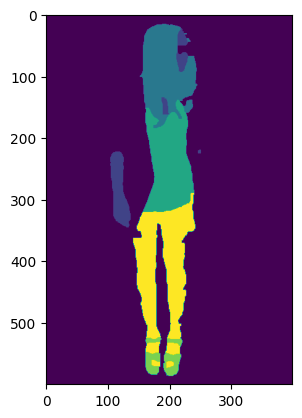

In [ ]:
#example clothing label
print(example_clothing[0, 200, 200:])
plt.imshow(example_clothing[0])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

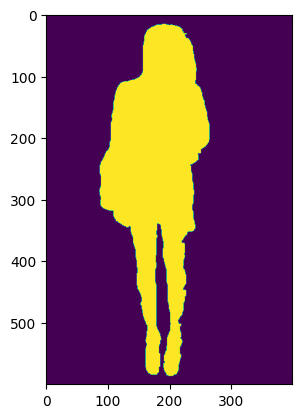

In [ ]:
#example person label
print(example_person[0, 30, 100:])
plt.imshow(example_person[0])

In [ ]:
print(len(os.listdir("/content/gdrive/MyDrive/CSC420_Final_Project/project3/val_labels_clothing/")))

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/CSC420_Final_Project/project3/val_labels_clothing/'

In [ ]:
import os

In [ ]:
class SegmentationDataset(Dataset):
    def __init__(self, imgs_path, labels_path, num_classes):
        self.imgs_path = imgs_path
        self.imgs = sorted(os.listdir(imgs_path))

        if '.DS_Store' in self.imgs[0]:
            self.imgs = self.imgs[1:]
        self.labels_path = labels_path

        self.labels = sorted(os.listdir(labels_path))
        if '.DS_Store' in self.labels[0]:
            self.labels = self.labels[1:]
        self.num_classes = num_classes
    def __getitem__(self, idx):
        """ Get image and its corresponding label """
        # img_p = os.path.join(self.imgs_path, )
        # print(os.path.join(self.imgs_path, self.imgs[idx]))
        img = read_image(os.path.join(self.imgs_path, self.imgs[idx]))
        # label_p = self.labels_path[idx]
        # print(os.path.join(self.labels_path, self.labels[idx]))

        label = read_image(os.path.join(self.labels_path, self.labels[idx]))
        # print(label.size())
        # img = torch.cat((1 - current_label, current_label), dim=1)
        label = nn.functional.one_hot(label.long(), num_classes=self.num_classes)
        label = label.permute(0, 3, 1, 2).squeeze(0)
        # one_hot_label = np.zeros((self.num_classes, label.shape[1], label.shape[2]))

        # for i, unique_value in enumerate(np.unique(label)):
        #   one_hot_label[i][label == unique_value] = 1
        return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))

    def __len__(self):
        return len(self.imgs)

In [ ]:
train_data_person = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/labels_person/", num_classes=2)
train_data_clothing = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/labels_clothing/", num_classes=7)

val_data_person = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/val_images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/val_labels_person/", num_classes=2)
val_data_clothing = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/val_images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/val_labels_clothing/", num_classes=7)

test_data_person = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/test_images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/test_labels_person/", num_classes=2)
test_data_clothing = SegmentationDataset("/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/test_images/", "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/test_labels_clothing/", num_classes=7)

In [ ]:
len(sorted(os.listdir("/content/gdrive/MyDrive/CSC420_Final_Project/project3/labels_clothing/")))

In [ ]:
print(len(train_data_person.imgs))
print(len(train_data_clothing.imgs))
print(len(val_data_person.imgs))
print(len(val_data_clothing.imgs))
print(len(test_data_person.imgs))
print(len(test_data_clothing.imgs))

480
480
60
60
60
60


In [ ]:
print(train_data_clothing.__getitem__(5)[1].shape)

torch.Size([3, 600, 400])


<ipython-input-75-9b8856008004>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))


In [ ]:
print(train_data_clothing.__getitem__(5)[1][:, 100, 200])

tensor([0., 0., 1., 0., 0., 0., 0.])


<ipython-input-75-9b8856008004>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))


In [ ]:
train_data_clothing.__getitem__(1)[1].size()

# Resnet Model

In [ ]:
class ResidualBlockEncoder(nn.Module):
    expansion = 1
    def __init__(self, input_channels, out_channels, dilation, stride=1,
                 downsample=None):
        super(ResidualBlockEncoder, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=out_channels,\
                           kernel_size=3, stride=stride, padding=dilation, dilation=dilation)

        self.norm1 = nn.BatchNorm2d(num_features=out_channels)
        # self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 32 x 32 x 75 x 50
        self.conv2 = nn.Conv2d(in_channels=out_channels, out_channels=out_channels,\
                            kernel_size=3, stride=stride, padding=dilation, dilation=dilation)

        self.norm2 = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU()
        self.downsample = downsample
    def forward(self, x):
        # print('Encoder')
        residual = x.clone()
        # print('Residual Before downsample:', residual.size())
        # print('X Before conv:', x.size())
        x = self.relu(self.norm1(self.conv1(x)))
        # print('X After conv1:', x.size())
        x = self.relu(self.norm2(self.conv2(x)))

        if self.downsample:
            residual = self.downsample(residual)

        # print('Residual After downsample:', residual.size())
        # print('X After conv:', x.size())
        x = x + residual
        x = self.relu(x)

        return x


In [ ]:
class ResNetEncoder(nn.Module):
    def __init__(self, num_blocks, ResidualBlock, dilations, img_channels=3,
                 out_channels=16):
        super(ResNetEncoder, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=img_channels, out_channels=out_channels,\
                           kernel_size=3, stride=2, padding=1)
        self.norm1 = nn.BatchNorm2d(num_features=out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.layer_in_channels = out_channels
        self.layer1 = self._make_layer(ResidualBlock, num_blocks[0], dilations[0], out_channels=32)
        self.layer2 = self._make_layer(ResidualBlock, num_blocks[1], dilations[1], out_channels=64, stride=1)
        self.layer3 = self._make_layer(ResidualBlock, num_blocks[2], dilations[2], out_channels=128, stride=1)
        self.layer4 = self._make_layer(ResidualBlock, num_blocks[3], dilations[3], out_channels=256, stride=1)

        self.relu = nn.ReLU()

    def _make_layer(self, ResidualBlock, num_blocks, dilation, out_channels, stride=1):
        downsample = None
        if stride != 1 or self.layer_in_channels != out_channels * ResidualBlock.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.layer_in_channels, out_channels * ResidualBlock.expansion, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * ResidualBlock.expansion)
            )

        layer = []
        layer.append(ResidualBlock(self.layer_in_channels, out_channels, dilation, stride, downsample))
        self.layer_in_channels = out_channels * ResidualBlock.expansion

        for i in range(1, num_blocks):
            layer.append(ResidualBlock(self.layer_in_channels, out_channels, dilation, stride))

        return nn.Sequential(*layer)

    def forward(self, x):

        x = self.relu(self.norm1(self.conv1(x)))
        x = self.layer1(x)
        # p1_shape = x.shape
        x_1 = x.clone()
        # x, ind_1 = self.pool(x)
        # x, ind_2 = self.pool(x)
        x = self.layer2(x)
        p2_shape = x.shape
        x_2 = x.clone()
        x, ind_2 = self.pool(x)

        x = self.layer3(x)
        # p3_shape = x.shape
        x_3 = x.clone()
        # x, ind_3 = self.pool(x)
        # x, ind_4 = self.pool(x)
        x = self.layer4(x)
        p4_shape = x.shape
        x_4 = x.clone()
        x, ind_4 = self.pool(x)
        # x, ind_5 = self.pool(x)
        clones = [x_1, x_2, x_3, x_4]
        # return x, ind_1, ind_2, ind_3, ind_4, ind_5
        # return x, ind_1, ind_2, ind_3, ind_4, p1_shape, p2_shape, p3_shape, p4_shape, clones
        return x, ind_2, ind_4, p2_shape, p4_shape, clones

In [ ]:
class ResidualBlockDecoder(nn.Module):
    expansion = 1
    def __init__(self, input_channels, out_channels, dilation, stride=1,
                 upsample=None):
        super(ResidualBlockDecoder, self).__init__()
        self.t_conv1 = nn.ConvTranspose2d(in_channels=input_channels, out_channels=out_channels,\
                           kernel_size=3, stride=stride, output_padding=0, dilation=dilation, padding=dilation)

        self.norm1 = nn.BatchNorm2d(num_features=out_channels)
        # self.pool = nn.MaxPool2d(kernel_size=2, stride=2)


        self.t_conv2 = nn.ConvTranspose2d(in_channels=out_channels, out_channels=out_channels,\
                            kernel_size=3, stride=stride, output_padding=0, dilation=dilation, padding=dilation)

        self.norm2 = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU()
        self.upsample = upsample
    def forward(self, x):
        # print('Decoder')
        residual = x.clone()
        # print('Residual Before upsample:', residual.size())
        # print('X Before conv:', x.size())
        x = self.relu(self.norm1(self.t_conv1(x)))
        # print('X After conv1:', x.size())
        x = self.relu(self.norm2(self.t_conv2(x)))

        if self.upsample:
            residual = self.upsample(residual)

        # print('Residual After upsample:', residual.size())
        # print('X After conv:', x.size())
        x = x + residual
        x = self.relu(x)

        return x


In [ ]:
class ResNetDecoder(nn.Module):
    def __init__(self, num_blocks, ResidualBlock, dilations, num_classes,
                 encoder_out_channels=256, layer4_out_channels=16):
        super(ResNetDecoder, self).__init__()
        self.layer_in_channels = encoder_out_channels

        self.layer1 = self._make_layer(ResidualBlock, num_blocks[3], dilations[3], out_channels=128)
        self.layer2 = self._make_layer(ResidualBlock, num_blocks[2], dilations[2], out_channels=64, stride=1)
        self.layer3 = self._make_layer(ResidualBlock, num_blocks[1], dilations[1], out_channels=32, stride=1)
        self.layer4 = self._make_layer(ResidualBlock, num_blocks[0], dilations[0], out_channels=16, stride=1)

        self.t_conv = nn.ConvTranspose2d(in_channels=layer4_out_channels, out_channels=num_classes,\
                    kernel_size=3, stride=2, padding=1, output_padding=1)
        self.norm1 = nn.BatchNorm2d(num_features=num_classes)
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()


    def _make_layer(self, ResidualBlock, num_blocks, dilation, out_channels, stride=1):
        upsample = None
        if stride != 1 or self.layer_in_channels != out_channels * ResidualBlock.expansion:
            upsample = nn.Sequential(
                nn.ConvTranspose2d(self.layer_in_channels * 2, out_channels * ResidualBlock.expansion, stride=stride, kernel_size=1),
                nn.BatchNorm2d(out_channels * ResidualBlock.expansion),
            )

        layer = []
        layer.append(ResidualBlock(self.layer_in_channels * 2, out_channels, dilation, stride, upsample))
        self.layer_in_channels = out_channels * ResidualBlock.expansion

        for i in range(1, num_blocks):
            layer.append(ResidualBlock(self.layer_in_channels, out_channels, dilation, stride))

        return nn.Sequential(*layer)

    # def forward(self, x, ind_1, ind_2, ind_3, ind_4, ind_5):
    # def forward(self, x, ind_1, ind_2, ind_3, ind_4, p1_shape, p2_shape, p3_shape, p4_shape, clones):
    # def forward(self, x, ind_1, ind_2, ind_3, ind_4, p1_shape, p2_shape, p3_shape, p4_shape, clones):
    def forward(self, x, ind_2, ind_4, p2_shape, p4_shape, clones):
        # print(x.shape)
        x = self.unpool(x, ind_4, output_size=p4_shape)
        x = torch.cat((x, clones[3]), dim=1)
        # print(x.shape)
        x = self.layer1(x)
        # print("hello")
        # x = self.unpool(x, ind_5)
        # x = self.unpool(x, ind_3, output_size=p3_shape)
        x = torch.cat((x, clones[2]), dim=1)
        x = self.layer2(x)
        x = self.unpool(x, ind_2, output_size=p2_shape)
        x = torch.cat((x, clones[1]), dim=1)
        x = self.layer3(x)
        # x = self.unpool(x, ind_1, output_size=p1_shape)
        x = torch.cat((x, clones[0]), dim=1)
        # x = self.unpool(x, ind_3)
        x = self.layer4(x)
        # x = self.unpool(x, ind_2)
        # print('AFTER LAYER4 DECODER:', x.size())
        x = self.relu(self.norm1(self.t_conv(x)))
        # print('AFTER LAST CONV DECODER:', x.size())
        # x = self.unpool(x, ind_1, output_size=pool1_shape)



        return x

In [ ]:
class ImageSegmentation(nn.Module):
    def __init__(self, num_blocks, dilations, task):
        super(ImageSegmentation, self).__init__()
        num_classes = 7 if task == 'clothing' else 2
        self.encoder = ResNetEncoder(num_blocks, ResidualBlockEncoder, dilations, img_channels=3)
        self.decoder = ResNetDecoder(num_blocks, ResidualBlockDecoder, dilations,
                                     encoder_out_channels=256, layer4_out_channels=16, num_classes=num_classes)
        # self.pool = nn.AdaptiveAvgPool2d(None)

    def forward(self, x):

        # x, ind_1, ind_2, ind_3, ind_4, ind_5 = self.encoder(x)
        # x, ind_1, ind_2, ind_3, ind_4, p1_shape, p2_shape, p3_shape, p4_shape, clones = self.encoder(x)
        x, ind_2, ind_4, p2_shape, p4_shape, clones = self.encoder(x)
        # print('AFTER ENCODER: ', x.size())
        # x = self.pool(x)
        # x = self.decoder(x, ind_1, ind_2, ind_3, ind_4, ind_5)
        # x = self.decoder(x, ind_1, ind_2, ind_3, ind_4, p1_shape, p2_shape, p3_shape, p4_shape, clones)
        x = self.decoder(x, ind_2, ind_4, p2_shape, p4_shape, clones)

        return x
    def save(self, path):
        torch.save(self.encoder.state_dict(), '{}_encoder.pk'.format(path))
        torch.save(self.decoder.state_dict(), '{}_decoder.pk'.format(path))

    def load(self, path):
        self.actor.load_state_dict(torch.load(self.encoder.state_dict(), '{}_encoder.pk'.format(path), map_location=torch.device('cpu')))
        self.critic.load_state_dict(torch.load(self.decoder.state_dict(), '{}_decoder.pk'.format(path), map_location=torch.device('cpu')))

In [ ]:
from torchmetrics import JaccardIndex

In [ ]:
def get_accuracy(model, data, num_classes):
    # note: why should we use a larger batch size here?
    # We do not need to compute paramater updates, thus a smaller batch size is
    # not advantageous. A larger batch size will reduce number of iterations
    # and would allow for more parallel computations. Therefore, it would be
    # faster.
    loader = torch.utils.data.DataLoader(data, batch_size=2, shuffle=True)

    model.eval() # annotate model for evaluation (why do we need to do this?)
    # some layers act differently in training vs testing, e.g: BatchNorm,
    # Dropout. Need to "turn them off" when calculating accuracy.
    correct = 0
    total = 0
    N = 0
    accs_list = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    jaccard = JaccardIndex(task="multiclass", num_classes=num_classes).to(device)
    iou_list = []
    # print((loader))
    if torch.cuda.is_available():
        model.cuda()
    i = 0
    for imgs, labels in loader:
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        output = model(imgs)

        pred = output.argmax(1, keepdim=True)[1]
        target = labels.argmax(1, keepdim=True)[1]
        # return pred
        iou = jaccard(pred, target)
        # print("IOU:", iou)
        iou_list.append(iou)
        correct = pred.eq(target.view_as(pred)).sum().item()
        # print(correct)
        # print((imgs.shape))
        acc = correct / (imgs.shape[2] * imgs.shape[3] * imgs.shape[0])
        accs_list.append(acc)

        i += 1
        if i == 1:
          print("Prediction", np.unique(pred.cpu().numpy(), return_counts=True))
          print("Target", np.unique(target.cpu().numpy(), return_counts=True))
    # print(sum(accs_list)/len(accs_list))
    return sum(accs_list)/len(accs_list), sum(iou_list) / len(iou_list)

In [ ]:
!pip install torchmetrics

In [ ]:
def iou_metric(model, data, num_classes):
    loader = torch.utils.data.DataLoader(data, batch_size=2)

    model.eval() # annotate model for evaluation (why do we need to do this?)
    # some layers act differently in training vs testing, e.g: BatchNorm,
    # Dropout. Need to "turn them off" when calculating accuracy.
    correct = 0
    total = 0
    N = 0
    # print((loader))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    jaccard = JaccardIndex(task="multiclass", num_classes=num_classes).to(device)
    iou_list = []
    if torch.cuda.is_available():
        model.cuda()
    for imgs, labels in loader:
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        output = model(imgs)

        pred = output.argmax(1, keepdim=True)[1]
        target = labels.argmax(1, keepdim=True)[1]
        iou = jaccard(pred, target)
        # print("IOU:", iou)
        iou_list.append(iou)
        # print(iou)
    # Compute the mean over the batch dimension.
    # print("IOU_LIST:", sum(iou_list)/len(iou_list))
    return sum(iou_list) / len(iou_list)

In [ ]:
class IoULoss(nn.Module):
    def __init__(self, num_classes, weight=None):
        super(IoULoss, self).__init__()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.jaccard = JaccardIndex(task="multiclass", num_classes=num_classes).to(device)
    def forward(self, outputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        # inputs = F.sigmoid(inputs)
        pred = nn.functional.softmax(outputs, dim=1)
        # #flatten label and prediction tensors
        pred = pred.view(-1)
        targets = targets.view(-1)

        #intersection is equivalent to True Positive count
        #union is the mutually inclusive area of all labels & predictions
        intersection = (pred * targets).sum()
        total = (pred + targets).sum()
        union = total - intersection

        IoU = (intersection + smooth)/(union + smooth)

        # IoU = self.jaccard(pred, targets)

        return 1 - IoU

In [ ]:
def train(train_data, valid_data, model, checkpoint_path, checkpoint_dir, num_classes, num_epochs=50, learning_rate=1e-3, batch_size=32,
          weight_decay=0):
    train = torch.utils.data.DataLoader(train_data, batch_size=batch_size,\
                                        shuffle=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_weights = torch.tensor([0.8, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    # criterion = IoULoss(num_classes=num_classes)
    if not os.path.exists(checkpoint_dir):
        os.mkdir(checkpoint_dir)
    epoch = 0
    train_accs, train_losses = [], []
    val_accs = []
    iters = []
    n = 0
    epochs = []
    val_ious = []
    train_ious = []
    batch_loss = 0
    if torch.cuda.is_available():
        model.cuda()
        criterion.cuda()
    # get_accuracy(model, valid_data)
    # iou_metric(model, valid_data, num_classes)

    # jaccard = JaccardIndex(task="multiclass", num_classes=num_classes).to(device)
    while epoch < num_epochs:
        learning_rate = learning_rate
        optimizer = optim.Adam(model.parameters(),
                lr=learning_rate,
                weight_decay=weight_decay)
        model.train()
        for imgs, labels in train:
            epoch_loss = 0
            if imgs.shape[0] < batch_size:
                # Last batch will have less images since it will be the
                # remainder of Total images / batch_size.

                # Adjust the learning rate of the last batch by
                # (size(last_batch) / batch_size) to account
                # for the smaller size.

                learning_rate = learning_rate * (imgs.shape[0] / batch_size)
                optimizer = optim.Adam(model.parameters(),
                                        lr=learning_rate,
                                        weight_decay=weight_decay)
            if torch.cuda.is_available():
                imgs = imgs.cuda()
                # labels = labels.cuda()

            outputs = model(imgs)
            labels = labels.squeeze(dim=1)
            if torch.cuda.is_available():
                outputs = outputs.cuda()
                # labels = labels.cuda()
            # pred = nn.functional.softmax(outputs, dim=1)
            # target = labels.argmax(1, keepdim=True)[1]
            # loss = criterion(outputs, labels.cuda())
            # loss = 1 - jaccard(pred.to(device), labels.to(device))
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            if n % 8:
              optimizer.step()
              optimizer.zero_grad()

            n += 1
            # print(n)
            iters.append(n)
            # average loss
            train_losses.append(float(loss)/batch_size)
            epoch_loss += float(loss)






        # end of epoch
        epoch += 1
        epochs.append(epoch)
        train_acc, train_iou = get_accuracy(model, train_data, num_classes)
        train_accs.append(train_acc)
        # train_iou = iou_metric(model, train_data, num_classes)
        train_ious.append(train_iou)


        val_acc, val_iou = get_accuracy(model, valid_data, num_classes)
        val_accs.append(val_acc)
        # val_iou = iou_metric(model, valid_data, num_classes)
        val_ious.append(val_iou)

        if epoch % 10 and learning_rate > 1e-4:
          learning_rate /= 10
        print("--------------------------------------------------------------")
        print("Epochs: {}   Train Accuracy: {}   Train IOU: {}   Val Accuracy: {}   Val IOU: {}   Epoch Loss: {}".format(epoch, train_acc, train_iou, val_acc, val_iou, epoch_loss))
        print("--------------------------------------------------------------")
        # print("Epochs: {}   Val Accuracy: {}".format(epoch, val_acc))

        # checkpoint_path = '/content/gdrive/My Drive/CSC420/A2/ckpt-{}.pk'

        # torch.save(model.state_dict(), checkpoint_path.format(epoch))
        model.save(checkpoint_path.format(epoch))
    return iters, train_losses, epochs, train_accs, val_accs, train_ious, val_ious


In [ ]:
person_checkpoint_path = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/checkpoints/person_checkpoint/checkpoint-{}"
clothing_checkpoint_path= "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/checkpoints/clothing_checkpoint/checkpoint-{}"

In [ ]:
person_checkpoint_dir = "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/checkpoints/person_checkpoint"
clothing_checkpoint_dir= "/content/gdrive/MyDrive/CSC420_Final_Project/project3/project3/checkpoints/clothing_checkpoint"

In [ ]:
img_size = train_data_person.__getitem__(1)[1].size()
num_blocks = [2, 4, 4, 8]
dilations = [2, 4, 8, 16]

<ipython-input-4-71e154430c94>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))


In [ ]:
task = 'person'
model = ImageSegmentation(num_blocks=num_blocks, dilations=dilations, task=task)

In [ ]:
print(len(test_data_person.imgs))

In [ ]:
iters, train_losses, epochs, train_accs, val_accs, train_ious, val_ious = train(train_data_person,
                                                          val_data_person, model,
                                                          num_epochs=50,
                                                          learning_rate=1e-4,
                                                          batch_size=16,
                                                          weight_decay=0,
                                                          checkpoint_path=person_checkpoint_path,
                                                          checkpoint_dir=person_checkpoint_dir,
                                                          num_classes=2)

In [ ]:
def get_accuracy2(model, data):
    # note: why should we use a larger batch size here?
    # We do not need to compute paramater updates, thus a smaller batch size is
    # not advantageous. A larger batch size will reduce number of iterations
    # and would allow for more parallel computations. Therefore, it would be
    # faster.
    loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=False)

    model.eval() # annotate model for evaluation (why do we need to do this?)
    # some layers act differently in training vs testing, e.g: BatchNorm,
    # Dropout. Need to "turn them off" when calculating accuracy.
    correct = 0
    total = 0
    N = 0
    # print((loader))
    if torch.cuda.is_available():
        model.cuda()
    i = 0
    colors = ['black','green', 'blue', 'purple', 'pink', 'orange', 'yellow']
    for imgs, labels in loader:
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        output = model(imgs)
        # print(pred.shape)
        pred = output.argmax(1, keepdim=True)
        target = labels.argmax(1, keepdim=True)
        print(pred.shape)
        i += 1
        plt.imshow(pred.cpu()[0, 0, :, :])
        plt.show()
        plt.imshow(target.cpu()[0, 0, :, :])
        # print(pred.shape)
        print(pred[:, :, 200:-200, 200:-150])
        print(target[:, :, 200:-200, 200:-150])
        plt.show()
        if i == 3:
          break
    return pred, target # TODO: return the model accuracy

In [ ]:
output = get_accuracy2(model, train_data_person)

In [ ]:
output = get_accuracy2(model, val_data_person)

In [ ]:
print(output)

In [ ]:
plt.imshow(output.cpu()[0, 0, :, :], cmap='gray')

In [ ]:
task = 'clothing'
model = ImageSegmentation(num_blocks=num_blocks, dilations=dilations, task=task)

In [ ]:
iters, train_losses, epochs, train_accs, val_accs, train_ious, val_ious = train(train_data_clothing,
                                                          val_data_clothing, model,
                                                          num_epochs=60,
                                                          learning_rate=0.0001,
                                                          batch_size=2,
                                                          weight_decay=0,
                                                          checkpoint_path=clothing_checkpoint_path,
                                                          checkpoint_dir=clothing_checkpoint_dir,
                                                          num_classes=7)

<ipython-input-4-71e154430c94>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))


Prediction (array([0, 1, 2, 3, 4, 5, 6]), array([89419, 69971, 15869,  8072, 17374, 14483, 24812]))
Target (array([0, 1, 2, 3, 4, 5]), array([187914,   7444,   7549,  20134,   4989,  11970]))
Prediction (array([0, 1, 2, 3, 4, 5, 6]), array([112093,   9238,  23716,  14422,  33154,  20118,  27259]))
Target (array([0, 1, 2, 3, 4, 6]), array([196937,   4777,  12303,    598,  11038,  14347]))
--------------------------------------------------------------
Epochs: 1   Train Accuracy: 0.2624330295138887   Train IOU: 0.17725837230682373   Val Accuracy: 0.26066861111111117   Val IOU: 0.17769283056259155   Epoch Loss: 2.1292948722839355
--------------------------------------------------------------
Prediction (array([0, 1, 2, 3, 4, 5, 6]), array([132782,  12272,  16379,  15758,  24045,  22533,  16231]))
Target (array([0, 1, 2, 3, 4]), array([196369,   5567,   8405,  13440,  16219]))
Prediction (array([0, 1, 2, 3, 4, 5, 6]), array([121019,  19091,   8797,  33973,  16289,  19314,  21517]))
Target (

<ipython-input-6-71e154430c94>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return (torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32))


torch.Size([1, 1, 600, 400])


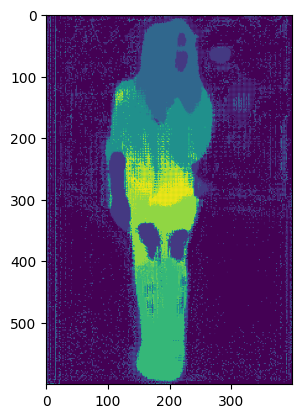

tensor([[[[3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          ...,
          [4, 4, 5,  ..., 0, 0, 0],
          [4, 4, 4,  ..., 0, 0, 3],
          [4, 4, 4,  ..., 0, 0, 0]]]], device='cuda:0')
tensor([[[[3, 3, 3,  ..., 0, 0, 0],
          [3, 3, 3,  ..., 0, 0, 0],
          [3, 3, 3,  ..., 0, 0, 0],
          ...,
          [5, 5, 5,  ..., 0, 0, 0],
          [5, 5, 5,  ..., 0, 0, 0],
          [5, 5, 5,  ..., 0, 0, 0]]]], device='cuda:0')


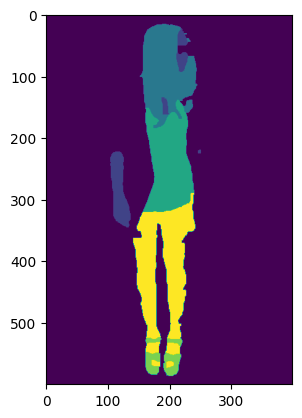

torch.Size([1, 1, 600, 400])


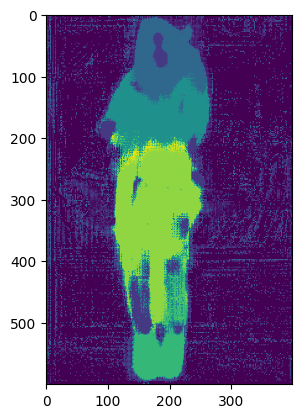

tensor([[[[3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 1],
          [3, 3, 3,  ..., 3, 3, 3],
          ...,
          [5, 5, 5,  ..., 0, 0, 0],
          [1, 5, 5,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0]]]], device='cuda:0')
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [5, 5, 5,  ..., 0, 0, 0],
          [5, 5, 5,  ..., 0, 0, 0],
          [5, 5, 5,  ..., 0, 0, 0]]]], device='cuda:0')


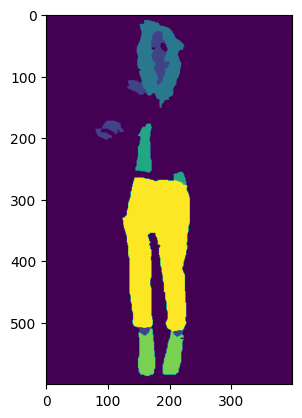

torch.Size([1, 1, 600, 400])


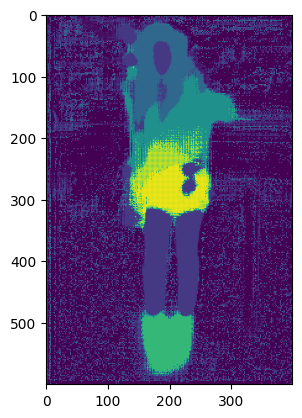

tensor([[[[3, 3, 6,  ..., 3, 3, 3],
          [3, 6, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 6],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 5, 0,  ..., 1, 0, 0],
          [0, 0, 0,  ..., 1, 0, 0]]]], device='cuda:0')
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]], device='cuda:0')


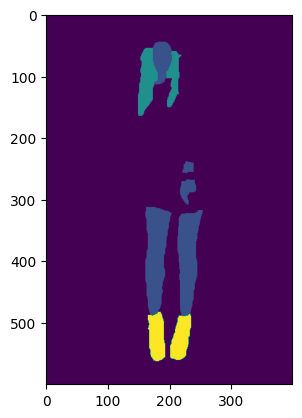

In [ ]:
output, target = get_accuracy2(model, train_data_clothing)

In [ ]:
print(np.unique(output.cpu().numpy(), return_counts=True))

(array([0, 1, 2, 3, 5, 6]), array([199056,  29062,      7,    176,    200,  11499]))


In [ ]:
print(np.unique(target.cpu().numpy(), return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([194055,  10151,   3085,  16465,  10406,   5838]))


In [ ]:
import pickle